In [7]:
import numpy as np
import pandas as pd
X=np.load("X.npy")
df=pd.DataFrame(X).to_csv("X.csv")

In [12]:
X.shape

(511, 45768)

row=511
column=45768

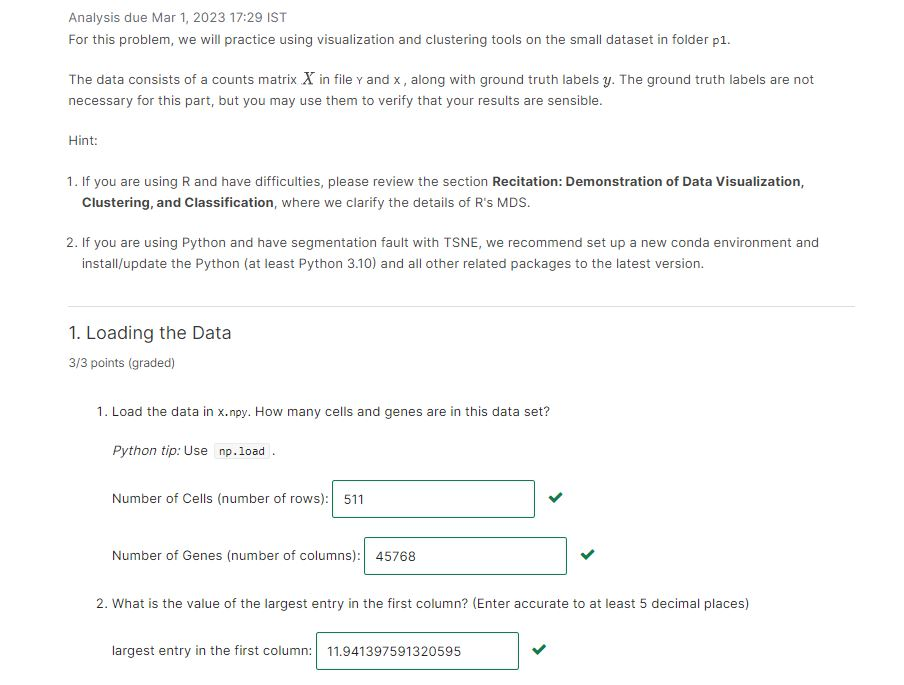

In [25]:
max_entry = np.max(X[:, 0])

In [32]:
max_entry

11.941397591320595

In [29]:
processed_data = np.log2(X + 1)

In [31]:
np.max(processed_data[:,0])

3.6939215228197613

In [33]:
np.cumsum(X)

array([0.00000000e+00, 0.00000000e+00, 1.33855304e+02, ...,
       5.11000000e+08, 5.11000000e+08, 5.11000000e+08])

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)

[0.42779671 0.14804008]


In [36]:
pca = PCA(n_components=2)
pca.fit(processed_data)
PCA(n_components=2)
print(pca.explained_variance_ratio_)

[0.13887565 0.06882332]


In [37]:
# assuming your raw data is stored in a numpy array called X_raw
pca_raw = PCA().fit(X)
explained_var_raw = pca_raw.explained_variance_ratio_

# compute cumulative explained variance
cumulative_var_raw = np.cumsum(explained_var_raw)

# find number of PCs needed to explain 85% of the variance
n_components_raw = np.argmax(cumulative_var_raw >= 0.85) + 1

print("Number of PCs needed for raw data:", n_components_raw)


Number of PCs needed for raw data: 36


In [38]:
pca_processed = PCA().fit(processed_data)
explained_var_processed = pca_processed.explained_variance_ratio_

# compute cumulative explained variance
cumulative_var_processed = np.cumsum(explained_var_processed)

# find number of PCs needed to explain 85% of the variance
n_components_processed = np.argmax(cumulative_var_processed >= 0.85) + 1

print("Number of PCs needed for processed data:", n_components_processed)


Number of PCs needed for processed data: 339


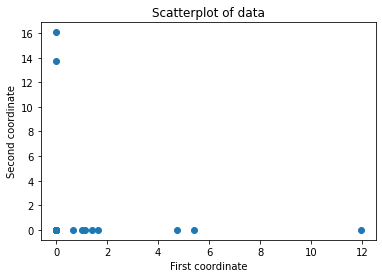

In [39]:
import matplotlib.pyplot as plt

# extract the first and second coordinates from the data
x = X[:,0]
y = X[:,1]

# create a scatterplot
plt.scatter(x, y)

# add labels and title
plt.xlabel('First coordinate')
plt.ylabel('Second coordinate')
plt.title('Scatterplot of data')

# show the plot
plt.show()


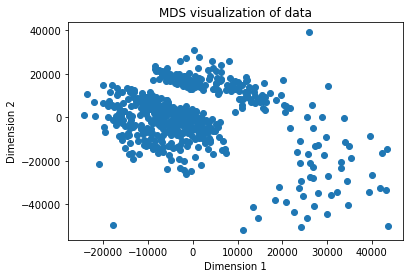

In [40]:
from sklearn.manifold import MDS

# assuming your data is stored in a numpy array called X
mds = MDS(n_components=2)
X_2d = mds.fit_transform(X)

# create a scatterplot
plt.scatter(X_2d[:,0], X_2d[:,1])

# add labels and title
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS visualization of data')

# show the plot
plt.show()


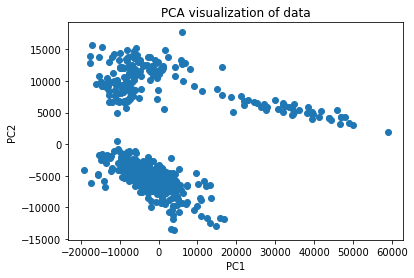

In [45]:
from sklearn.decomposition import PCA

# assuming your data is stored in a numpy array called X
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# create a scatterplot
plt.scatter(X_2d[:,0], X_2d[:,1],)

# add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA visualization of data')
# show the plot
plt.show()


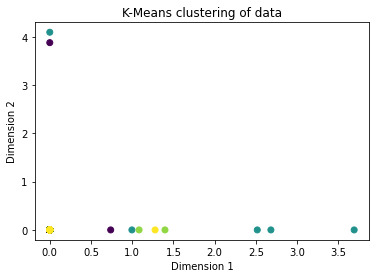

In [49]:
from sklearn.cluster import KMeans

# assuming your data is stored in a numpy array called X_2d
kmeans = KMeans(n_clusters=7)
kmeans.fit(processed_data)
labels = kmeans.labels_

# create a scatterplot with colors representing the K-Means cluster identities
plt.scatter(processed_data[:,0], processed_data[:,1], c=labels)

# add labels and title
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('K-Means clustering of data')

# show the plot
plt.show()


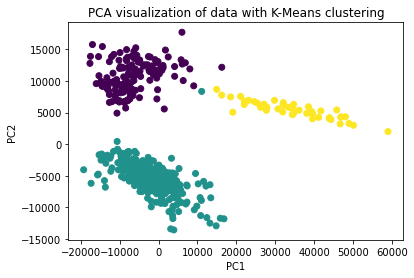

In [56]:
# assuming your data is stored in a numpy array called X
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

# create a scatterplot with colors representing the K-Means cluster identities
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels)

# add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA visualization of data with K-Means clustering')

# show the plot
plt.show()


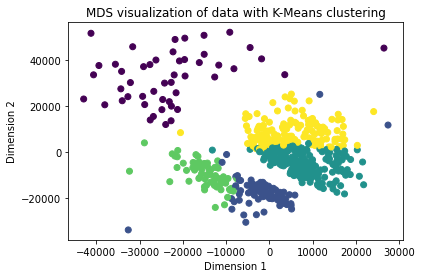

In [54]:
from sklearn.manifold import MDS

# assuming your data is stored in a numpy array called X
mds = MDS(n_components=2)
X_2d = mds.fit_transform(X)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_

# create a scatterplot with colors representing the K-Means cluster identities
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels)

# add labels and title
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS visualization of data with K-Means clustering')

# show the plot
plt.show()


C:\Users\Shavvy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Shavvy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


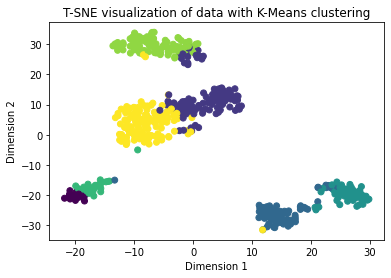

In [55]:
from sklearn.manifold import TSNE

# assuming your data is stored in a numpy array called X
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
labels = kmeans.labels_

# create a scatterplot with colors representing the K-Means cluster identities
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels)

# add labels and title
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('T-SNE visualization of data with K-Means clustering')

# show the plot
plt.show()


C:\Users\Shavvy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


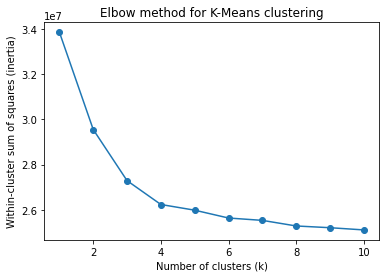

In [58]:
# assuming your data is stored in a numpy array called X
X_pca = processed_data

# try different values of k
ks = range(1, 11)
inertias = []

for k in ks:
    # create a KMeans instance with k clusters
    model = KMeans(n_clusters=k)
    
    # fit the model to the data
    model.fit(X_pca)
    
    # calculate the within-cluster sum of squares (inertia)
    inertia = model.inertia_
    inertias.append(inertia)

# plot the inertia versus the number of clusters
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (inertia)')
plt.title('Elbow method for K-Means clustering')
plt.show()


In [59]:
X_pca = processed_data

# fit KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

# compute within-cluster sum of squares (inertia)
inertia = kmeans.inertia_

print("K-Means clustering criterion (inertia) for k=3: {:.2f}".format(inertia))


K-Means clustering criterion (inertia) for k=3: 27285165.63


In [62]:
X_pca = processed_data

# fit KMeans model with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)

# compute within-cluster sum of squares (inertia)
inertia = kmeans.inertia_

print("K-Means clustering criterion (inertia) for k=4: {:.2f}".format(inertia))


K-Means clustering criterion (inertia) for k=4: 26229333.44


C:\Users\Shavvy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


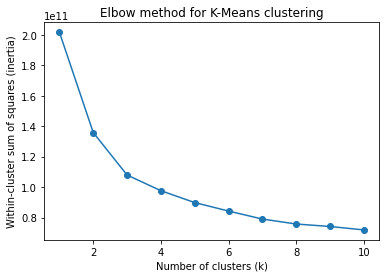

In [61]:
# assuming your data is stored in a numpy array called X
X_pca = X

# try different values of k
ks = range(1, 11)
inertias = []

for k in ks:
    # create a KMeans instance with k clusters
    model = KMeans(n_clusters=k)
    
    # fit the model to the data
    model.fit(X_pca)
    
    # calculate the within-cluster sum of squares (inertia)
    inertia = model.inertia_
    inertias.append(inertia)

# plot the inertia versus the number of clusters
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (inertia)')
plt.title('Elbow method for K-Means clustering')
plt.show()


In [63]:
X_pca = X

# fit KMeans model with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)

# compute within-cluster sum of squares (inertia)
inertia = kmeans.inertia_

print("K-Means clustering criterion (inertia) for k=4: {:.2f}".format(inertia))


K-Means clustering criterion (inertia) for k=4: 97632667703.55


In [64]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# project the data onto the top 50 PCs
pca = PCA(n_components=50)
pca_data = pca.fit_transform(X)

# run T-SNE with perplexity=40 on the projected data
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_data = tsne.fit_transform(pca_data)


C:\Users\Shavvy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Shavvy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\Shavvy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


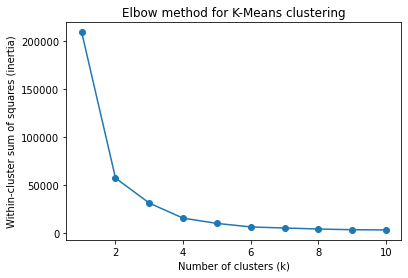

In [65]:
# assuming your data is stored in a numpy array called X
X_pca = tsne_data

# try different values of k
ks = range(1, 11)
inertias = []

for k in ks:
    # create a KMeans instance with k clusters
    model = KMeans(n_clusters=k)
    
    # fit the model to the data
    model.fit(X_pca)
    
    # calculate the within-cluster sum of squares (inertia)
    inertia = model.inertia_
    inertias.append(inertia)

# plot the inertia versus the number of clusters
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (inertia)')
plt.title('Elbow method for K-Means clustering')
plt.show()


In [66]:
X_pca = tsne_data

# fit KMeans model with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)

# compute within-cluster sum of squares (inertia)
inertia = kmeans.inertia_

print("K-Means clustering criterion (inertia) for k=4: {:.2f}".format(inertia))


K-Means clustering criterion (inertia) for k=4: 15408.68


In [74]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# project the data onto the top 50 PCs
pca = PCA(n_components=50)
pca_data = pca.fit_transform(X)

# fit K-Means model with 4 clusters to the projected data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data)

# calculate WGSS
wgss = kmeans.inertia_
print(f"WGSS with 4 clusters: {wgss:.2g}")


WGSS with 4 clusters: 7.3e+10
